In [47]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import oneDim_functions as oneDim #you might have to adjust this

In [43]:
#dictionaries for the plot names
ob_plot_info = {
        0: {
            "title": "cos; open boundary",
        },
        1: {
            "title": "sin; open boundary",
        }
}

pb_plot_info = {
        0: {
            "title": "cos; periodic boundary",
        },
        1: {
            "title": "sin; periodic boundary",
        }
}

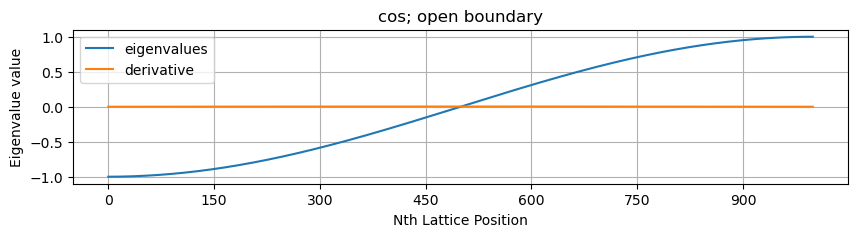

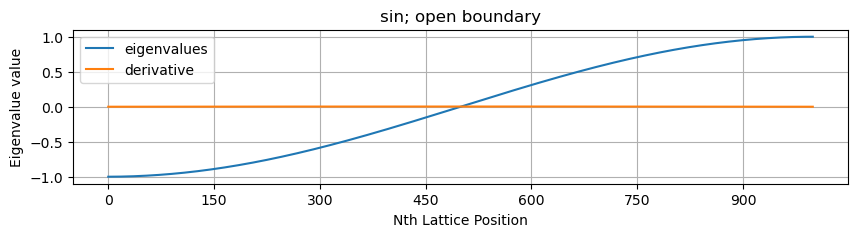

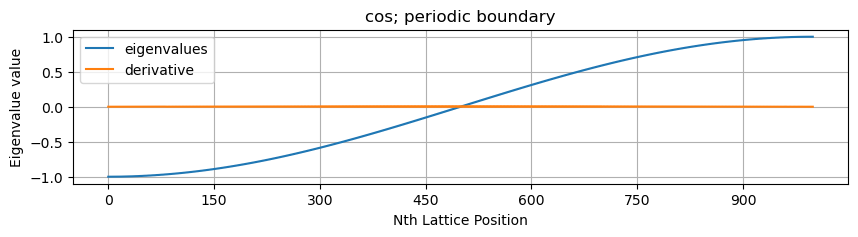

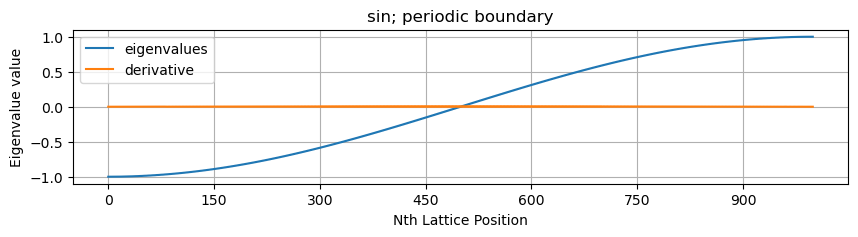

In [44]:
#-----Creating the matrices for cos, sin-----#

N = 1000 #size of 1D lattice

#list of matrices; index 0 is cos, index 1 is sin
ob_matrices = oneDim.construct_matrix('open',N) #open boundary
pb_matrices = oneDim.construct_matrix('periodic',N) #periodic boundary

#list of eigenvalues; index 0 is cos, index 1 is sin
ob_eigvals = oneDim.get_eigvalsh(ob_matrices) #you know the drill
pb_eigvals = oneDim.get_eigvalsh(pb_matrices)

#plot the eigenvalues vs. lattice position
ob_plots = oneDim.plot_eigvals(ob_eigvals,N, ob_plot_info)
pb_plots = oneDim.plot_eigvals(pb_eigvals,N, pb_plot_info)

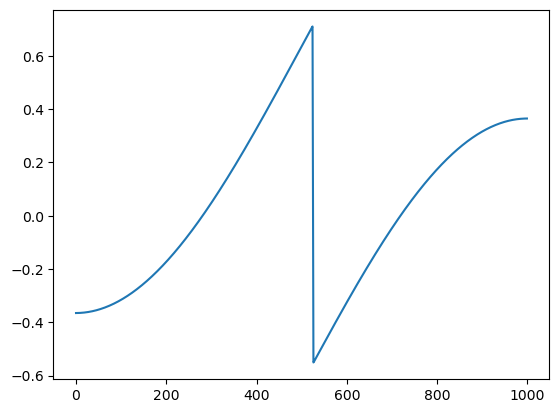

In [46]:
def testfunc(t,a,b,c): #assumed fit function
    return a*np.arctan(b*t+c)


coefs = sp.optimize.curve_fit(testfunc,np.arange(N),ob_eigvals[0],p0=[(2/np.pi),0,-N/2]) #find parameters for curve fit
a,b,c = coefs[0][0],coefs[0][1],coefs[0][2]

t=np.arange(N)
residual = ob_eigvals[0] - testfunc(t,a,b,c)
plt.plot(t,residual) #plot residual of cos open boudnary - curve fit